# Ultrasonic Sensors
Exempel: Scanners,  Production Line Sensors, Fluid Level Detection, Distance Messurment

##Applications:
Ultra sonic sensors can be used in many fields includig Tank Level sensors in industries for continius messurment of fuel and water, Production line sensors in factories for process automation, Distance Messurment and many more.
In this assignment i try to cover how fluid levels are messured by Fluid level transmitters usind ultrasonic sensors. The product that i have in mind is called EchoPod DX10-00.


## Detection with Ultra sonic level detector:
(The concept is similar for sonar sensors as well)
Since the speed of sound can be affected by air temprature the sensors usually have temprarue sensors connected to it for more accurate numbers and calculations. The speed of sound in rum tempreture in dry air is, 343 m/s, we can quickly messure the level of fluid keeping in mind that the noise travels in two directions, to and from the fluid level. As a result, we get the following velocity-time equation:

$$
Distance (meters) = \frac {(time \hspace{0.2cm} elapsed \hspace{0.2cm} [seconds] \times 343 \frac{meters}{second}}{2}
$$


So in order to calculate the level of fluid we can use a sensor that has a transmitter that transmits pulse and a reciever that recieves the pulse back.

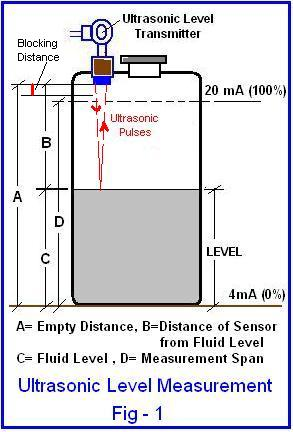


Below is a fuction that calculates the distance to a target:

In [1]:
# Constants. (Python har inte konstanter, konvention att använda versaler för konstanter)
SPEED_OF_SOUND = 343

""" Calculates distance to object from measured time
    d = t * s / 2
    d: distance (sträcka)
    s: speed of sound in rum tempratur, constant
    t: measured time
"""
def time_to_distance(time: float):
    d = (time * SPEED_OF_SOUND) / 2
    return d

# Short test. Assume 20 ns (nanoseconds) = 2.0 × 10^-8 s
pulseTimeMeasurement = 0.00000002
print(f"Measured distance: {time_to_distance(pulseTimeMeasurement)} m")

Measured distance: 3.43e-06 m


Here is an example of how we can configure an arduino ultra sonic sensor to transmit, wait and recieve pulses to then calculate the distance to target.

In [6]:
#define echoPin										 \
	2 // attach pin D2 Arduino to pin Echo of HC-SR04
#define trigPin										 \
	3 // attach pin D3 Arduino to pin Trig of HC-SR04										 \


long duration; // Variable to store time taken to the pulse to reach receiver

int distance; // Variable to store distance calculated using formula

void setup()
{
	pinMode(trigPin, OUTPUT); // Sets the trigPin as an OUTPUT
	pinMode(echoPin, INPUT); // Sets the echoPin as an INPUT

	// Serial Communication is starting with 9600 of baudrate speed
	Serial.begin(9600);

	// The text to be printed in serial monitor
	Serial.println(
		"Distance measurement using Arduino Uno.");
	delay(500);
}

void loop()
{
	digitalWrite(trigPin, LOW);
	delayMicroseconds(2); // wait for 2 ms to avoid collision in serial monitor

	digitalWrite(trigPin, HIGH); // turn on the Trigger to generate pulse
	delayMicroseconds(10); // keep the trigger "ON" for 10 ms to generate pulse for 10 ms.

	digitalWrite(trigPin, LOW); // Turn off the pulse trigger to stop pulse generation

	// If pulse reached the receiver echoPin become high Then pulseIn() returns the
	// time taken by the pulse to reach the receiver

	duration = pulseIn(echoPin, HIGH);
	distance = duration * 0.0344 / 2; // Expression to calculate distance using time

	Serial.print("Distance: ");
	Serial.print(distance); // Print the output in serial monitor
	Serial.println(" cm");
	delay(100);
}


IndentationError: ignored